In [1]:
# HERE I HAVE IMPORTED ALL THE REQUIRED LIBRARIES AND PAKAGES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Reading the Dataframe 
df_pesticides = pd.read_csv(r"E:\pred\dataset\pesticides.csv")
df_rainfall = pd.read_csv(r"E:\pred\dataset\rainfall.csv")
df_temp= pd.read_csv(r"E:\pred\dataset\temp.csv")
df_yield = pd.read_csv(r"E:\pred\dataset\yield.csv")

In [3]:
# Starts with the cleaning and preprossing of Dataframe One By one
# 1.df_pesticides
df_pesticides.shape

 

(4349, 7)

In [4]:
# Gathering the DataFrame Info
df_pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [5]:
# first five rows of dataframe 
df_pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [6]:
#Last 5 Rows of Dataframe
df_pesticides.tail()

,Domain,Area,Element,Item,Year,Unit,Value
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07
4348,Pesticides Use,Zimbabwe,Use,Pesticides (total),2016,tonnes of active ingredients,2185.07


In [7]:
# statistical summary of a DataFrame
#from this we get to know that the Minimum Year is 1990 and Maximum Year 2016
df_pesticides.describe()

,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [8]:
# get the values count of specific column
print(df_pesticides["Element"].value_counts())
print(df_pesticides["Domain"].value_counts())
print(df_pesticides["Unit"].value_counts())
print(df_pesticides["Item"].value_counts()) 

Element
Use    4349
Name: count, dtype: int64
Domain
Pesticides Use    4349
Name: count, dtype: int64
Unit
tonnes of active ingredients    4349
Name: count, dtype: int64
Item
Pesticides (total)    4349
Name: count, dtype: int64


Observation:
1.The columns Element, Domain, Unit, and Item each contain only a single unique values only.
2.These columns can be dropped from the dataset as they do not provide any useful information for model training or analysis.

In [9]:
# we are dropping these columns.
df_pesticides = df_pesticides.drop(['Element','Domain','Unit','Item'], axis=1)

In [10]:
# Renaming the column from 'Value' to 'Pesticides_tonnes' for better clarity and easy recognition.
df_pesticides = df_pesticides.rename(index=str, columns={"Value": "Pesticides_tonnes"})

In [11]:
# Checking Null values
# So the Pesticides dataframe does not contains any Null Values
df_pesticides.isnull().sum()

Area                 0
Year                 0
Pesticides_tonnes    0
dtype: int64

In [12]:
# Now for 2.Rainfall Dataframe
df_rainfall.shape

(6727, 3)

In [13]:
# Basic info of data 
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [14]:

# The "average_rain_fall_mm_per_year" column has a data type of "Object," so it needs to be converted to "float."
df_rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rainfall['average_rain_fall_mm_per_year'],errors = 'coerce')

In [15]:
# statistical summary of a DataFrame
#Here we get to know that the Min Year is 1985 and Max Year is 2017
df_rainfall.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,5947.000000
mean,2001.354839,1124.743232
std,9.530114,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [16]:
#first five rows of dataframe
df_rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327.0
1,Afghanistan,1986,327.0
2,Afghanistan,1987,327.0
3,Afghanistan,1989,327.0
4,Afghanistan,1990,327.0


In [17]:
#Last five rows of dataframe
df_rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327.0
1,Afghanistan,1986,327.0
2,Afghanistan,1987,327.0
3,Afghanistan,1989,327.0
4,Afghanistan,1990,327.0


In [18]:
# Rename the column name from " Area" to "Area" for easy recognition.
df_rainfall = df_rainfall.rename(index=str, columns={" Area": 'Area'})

In [19]:
# Checking the null values 
df_rainfall.isnull().sum()


Area                               0
Year                               0
average_rain_fall_mm_per_year    780
dtype: int64

Observations:
1.Rainfall data contain null values at average rainfall mm per year column.
2.We need to fill the values in rainfall data but it depends because we need more information about that.
3.So we are Droping the null values.

In [20]:
# Drop the null values  
df_rainfall = df_rainfall.dropna()

In [21]:
# Now for 3.Temp Dataframe
df_temp.shape

(71311, 3)

In [22]:
# Basic info of Dataframe 
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [23]:
# statistical summary of a DataFrame
#The Min Year is 1743 and Max Year is 2013
df_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [24]:
# First 5 rows of Dataframe
df_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [25]:
#Last 5 rows of Dataframe
df_temp.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [26]:
# Rename the column name from "year" to "Year" and "country" to "Area" for easy recognition.
df_temp = df_temp.rename(index=str, columns={"year": "Year", "country":'Area'})


In [27]:
#checking Null values
df_temp.isnull().sum() 


Year           0
Area           0
avg_temp    2547
dtype: int64

Observations:
1.Temp data contain null values at avg temp column.
2.We need to fill the values in temp data but it depends because we need more information about that.
3.So we are droping null values.

In [28]:
# Droping Null Values. 
df_temp = df_temp.dropna()
df_temp.isnull().sum() 


Year        0
Area        0
avg_temp    0
dtype: int64

In [29]:
# Now for 4. Yield Dataframe
df_yield.shape

(56717, 12)

In [30]:
# Basic Info of Dataframe
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [31]:
# statistical summary of a DataFrame
# Min Year is 1961 and Max Year 2016
df_yield.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


In [32]:
# first 5 rows of Yield dataframe
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [33]:
# Last 5 rows of yeild Dataframe
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [34]:
# checking vlaue count of specific Columns  
print((df_yield["Domain Code"]).value_counts())
print((df_yield["Domain"]).value_counts())
print((df_yield["Element Code"]).value_counts())
print((df_yield["Element"]).value_counts())
print((df_yield["Unit"]).value_counts())

Domain Code
QC    56717
Name: count, dtype: int64
Domain
Crops    56717
Name: count, dtype: int64
Element Code
5419    56717
Name: count, dtype: int64
Element
Yield    56717
Name: count, dtype: int64
Unit
hg/ha    56717
Name: count, dtype: int64


Observation:
1.Here we can see the columns Domain Code, Domain , Element Code, Element and Unit contains only single unique values only.
2.These columns do not provide any variability or meaningful information for the analysis or model training.
Conclusion:
Hence, I am dropping them from the dataset to simplify the data and remove redundancy.Also some other columns Year code,Item code,Area code and Item code which is not usefull for model training.

In [35]:

# Dropping unwanted columns 
df_yield = df_yield.drop(['Year Code','Element Code','Element','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)


In [36]:
# Rename the column name from "Value" to "hg/ha_yield" for easy recognition.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})

In [37]:
# Checking Null values
df_yield.isnull().sum()

Area           0
Item           0
Year           0
hg/ha_yield    0
dtype: int64

NOW MERGING OF DATASET 
1.As we can observe the "Area" and "Year" columns are present in all dataframe
2.So lets starts with Year.

In [38]:


# YEAR COLUMNS ANLYSIS

# For Pesticide Dataframe
pesticides_year = df_pesticides['Year'].unique()
pesticides_year.sort()
pesticides_year


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [39]:
#for Rainfall Dataframe 
rainfall_year = df_rainfall['Year'].unique()
rainfall_year.sort()
rainfall_year

array([1985, 1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [40]:
# for Temp DataFrame
temp_year = df_temp['Year'].unique()
temp_year.sort()
temp_year

array([1743, 1744, 1745, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757,
       1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779,
       1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 18

In [41]:
#For Yield Dataframe
yield_year = df_yield['Year'].unique()
yield_year.sort()
yield_year

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

In [42]:
min_year = max(max(min(pesticides_year), min(yield_year)), max(min(rainfall_year), min(temp_year)))
max_year = min(min(max(pesticides_year), max(yield_year)), min(max(rainfall_year), max(temp_year)))
min_year, max_year

(np.int64(1990), np.int64(2013))

Observation:
1.Pesticides data have been collected from 1990 to 2016.
2.Rainfall data have been collected from 1985 to 2017.
3.Temp data have been collected from 1743 to 2013.
4.Yield data have been collected from 1961 to 2016.

Conclusion: 
We have 24 years of data, ranging from 1990 to 2013, which is common in all of them.

In [43]:
# Now for Area
# AREA COLUMN ANALISYS

# for Pesticides Dataframe

pesticides_area = df_pesticides['Area'].unique()
pesticides_area.sort()
pesticides_area




array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gambia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
   

In [44]:
# For Rinfall Dataframe
rainfall_area = df_rainfall['Area'].unique()
rainfall_area.sort()
rainfall_area

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau

In [45]:
# For temp Dataframe
temp_area = df_temp['Area'].unique()
temp_area.sort()
temp_area

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Congo (Democratic Republic Of The)', 'Croatia', 'Czech Republic',
       "Côte D'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kenya', 'Laos', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Maced

In [46]:
# for Yield Dataframe
yield_area = df_yield['Area'].unique()
yield_area.sort()
yield_area

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Taiwan Province of',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic',

In [47]:
common_area = []
uncommon_area = []
for i in yield_area:
    if(i in rainfall_area and i in temp_area and i in pesticides_area):
        common_area.append(i)
    else:
        uncommon_area.append(i)

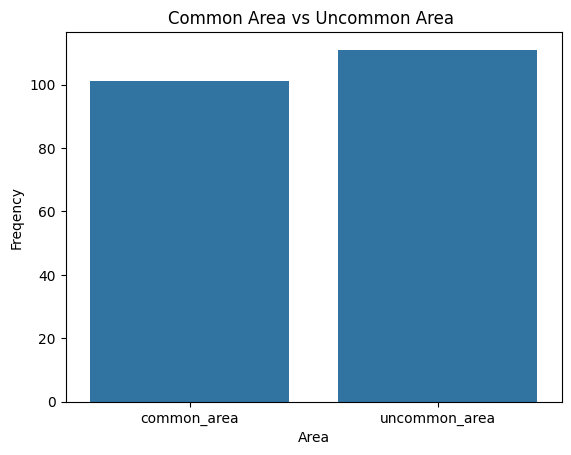

In [48]:
sns.barplot(x=['common_area', 'uncommon_area'], y=[len(common_area), len(uncommon_area)])
plt.title('Common Area vs Uncommon Area ')
plt.xlabel('Area')
plt.ylabel('Freqency')
plt.show()

Observation:
1.About 50% of the df_yield data belongs to the common_area category.
2.Upon careful observation, I found that yield_area contains area names that are no longer in use. Therefore, we need to carefully identify each uncommon area's corresponding new name and rename all the areas to their updated names to merge the data effectively.
3.Some areas may be missing or unaccounted for in one of the datasets. We will simply ignore those areas.

Conclusion :
Let's work on only those 50% of Dataset and Proceed with further as finding various names of the country and manually replacing every country name is hastle. So I'm skipping it.

In [49]:
# Now we have clear view of the Data so we can MERGE now
final_data = pd.merge(df_yield, df_rainfall, on=['Year','Area'])

In [50]:
final_data = pd.merge(final_data, df_pesticides, on=['Year','Area'])


In [51]:
final_data = pd.merge(final_data,df_temp, on=['Area','Year'])


In [52]:
# BASIC info about final_data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   Pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [53]:
# checking Null value 
# Good we dont see any Null values 
final_data.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
Pesticides_tonnes                0
avg_temp                         0
dtype: int64

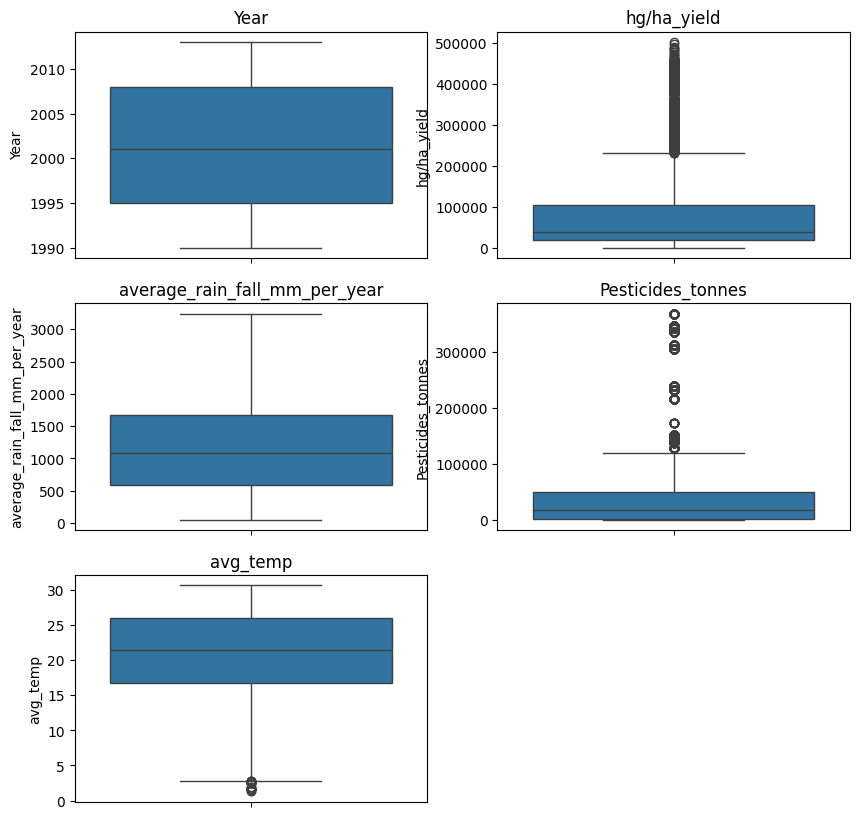

In [54]:
# Checking of Outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= final_data['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= final_data['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= final_data['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= final_data['Pesticides_tonnes'])
plt.title('Pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= final_data['avg_temp'])
plt.title('avg_temp')

plt.show()

Observation:
Here, we can see that the columns hg/ha_yield, Pesticides_tonnes, and avg_temp contain outliers. To address this, I have experimented with multiple methods, including RobustScaler, Local Outlier Factor (LOF), robust scaling with IQR-based outlier removal, and Box-Cox Transformation. However, none of these methods worked well—some failed to effectively reduce the outliers, while others introduced significant changes to the scale of the data.

Conclusion:
To successfully reduce the outliers while maintaining the integrity of the data scale, I applied the IQR method and Winsorization without transforming the data. This ensures that the data remains interpretable while minimizing the influence of extreme values.

<class 'pandas.core.frame.DataFrame'>
Index: 24692 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           24692 non-null  object 
 1   Item                           24692 non-null  object 
 2   Year                           24692 non-null  int64  
 3   hg/ha_yield                    24692 non-null  float64
 4   average_rain_fall_mm_per_year  24692 non-null  float64
 5   Pesticides_tonnes              24692 non-null  float64
 6   avg_temp                       24692 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.5+ MB
None
               Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  24692.000000   24692.000000                   24692.000000   
mean    2001.145148   58521.102886                    1127.739430   
std        7.098324   55656.461347                     725.814873   
min     1990.0

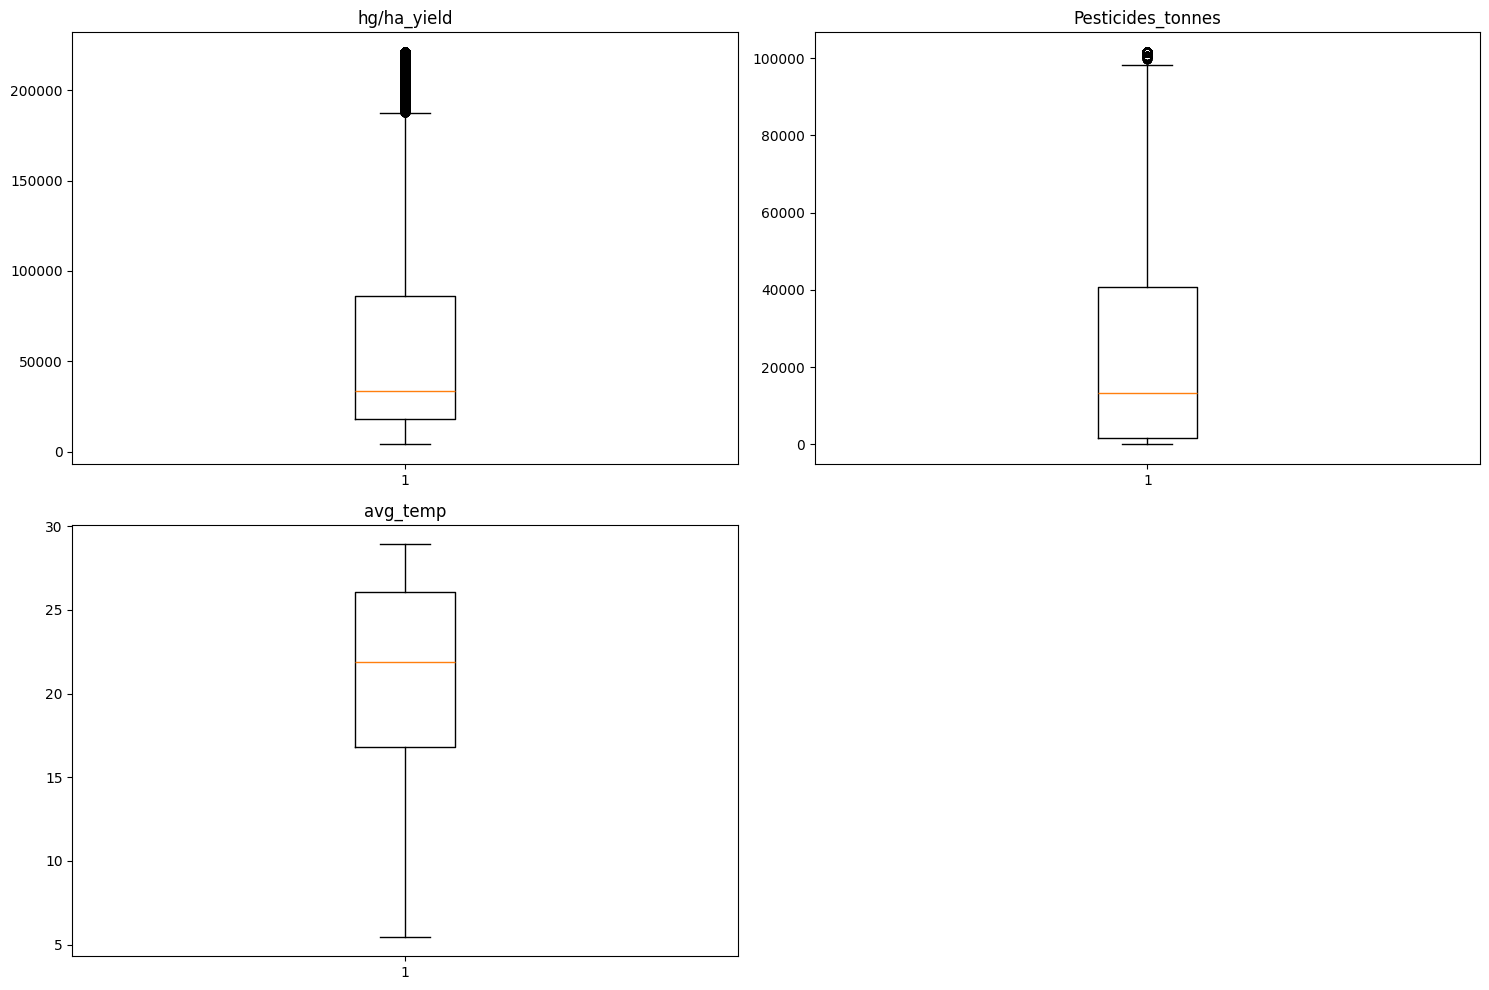

In [55]:

# Reducing the outlier 

# Columns to check for outliers
columns_to_check = ['hg/ha_yield', 'Pesticides_tonnes', 'avg_temp']

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Function to cap outliers using Winsorization
def winsorize_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the IQR method to remove extreme outliers
final_data_cleaned = remove_outliers_iqr(final_data.copy(), columns_to_check)

# Apply Winsorization to cap the remaining outliers
final_data_cleaned = winsorize_outliers(final_data_cleaned, columns_to_check)

# Check the resulting DataFrame
print(final_data_cleaned.info())
print(final_data_cleaned.describe())

# Visualize to confirm the effect of combined method
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(final_data_cleaned[column])
    plt.title(column)
plt.tight_layout()
plt.show()


Observation :
Here, we can see that the columns hg/ha_yield and Pesticides_tonnes contain some outliers, while the column avg_temp does not show any significant outliers. The detected outliers in the data are within a manageable range and can be effectively handled.

In [56]:
# Saving final data file 
final_data.to_csv('final_data.csv', index=False)

In [57]:
# checking the Item count 
final_data['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

observation:

1.Paddy and Rice are the same crop and hence renaming them
2.Plantains and others may be any number of distinct crops in over 100 countries so dropping them because they may not anything valuable

In [58]:
# Replacing Paddy with Rice
final_data['Item'] = final_data['Item'].str.replace('paddy','Rice')
final_data = final_data[final_data['Item'] != 'Plantains and others']
final_data['Item'].value_counts()

Item
Potatoes          4276
Maize             4121
Wheat             3857
Rice, Rice        3388
Soybeans          3223
Sorghum           3039
Sweet potatoes    2890
Cassava           2045
Yams               847
Name: count, dtype: int64

In [59]:
final_data["Item"] = final_data["Item"].str.replace("Rice, Rice", "Rice")


In [60]:
final_data["Item"].unique()

array(['Maize', 'Potatoes', 'Rice', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Yams'], dtype=object)

In [61]:
final_data.groupby(['Area'],sort = True)[['hg/ha_yield']].sum().nlargest(10, 'hg/ha_yield')

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


Observation:
Here we can see that INDIA is the highest yeild Producing Area .

In [62]:
final_data.groupby(['Area','Item'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area            Item          
India           Cassava           142810624
                Potatoes           92122514
Brazil          Potatoes           49602168
United Kingdom  Potatoes           46705145
Australia       Potatoes           45670386
India           Sweet potatoes     44439538
Japan           Potatoes           42918726
Mexico          Potatoes           42053880
                Sweet potatoes     35808592
Australia       Sweet potatoes     35550294
Name: hg/ha_yield, dtype: int64

Observation:

The datasets show that India is the highest datapoint in the Area column and 'Potato' is the dominant crop among all the crops.

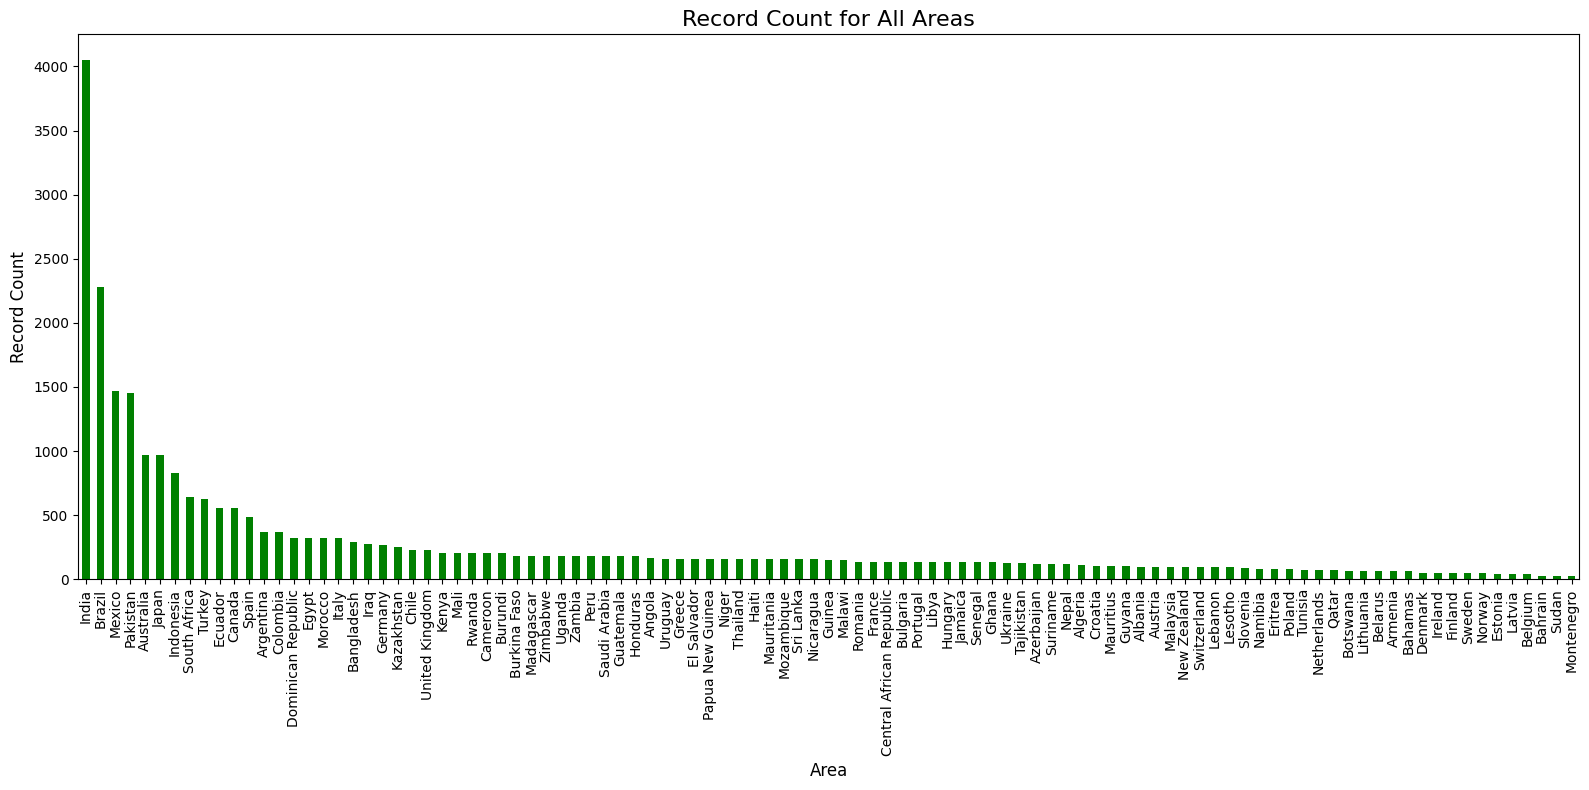

In [63]:


# Count the occurrences of each unique value in 'Area'
area_counts = final_data['Area'].value_counts()

# Plot the bar graph for all areas
plt.figure(figsize=(16, 8))  # Adjust size to accommodate all areas
area_counts.plot(kind='bar', color='green')
plt.title('Record Count for All Areas', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



Observation:
Here, we can observe that India, Brazil, and Mexico have the highest number of records, making them the areas with the most data entries. On the other hand, Montenegro, Sudan, and baharain are among the areas with the lowest number of records.

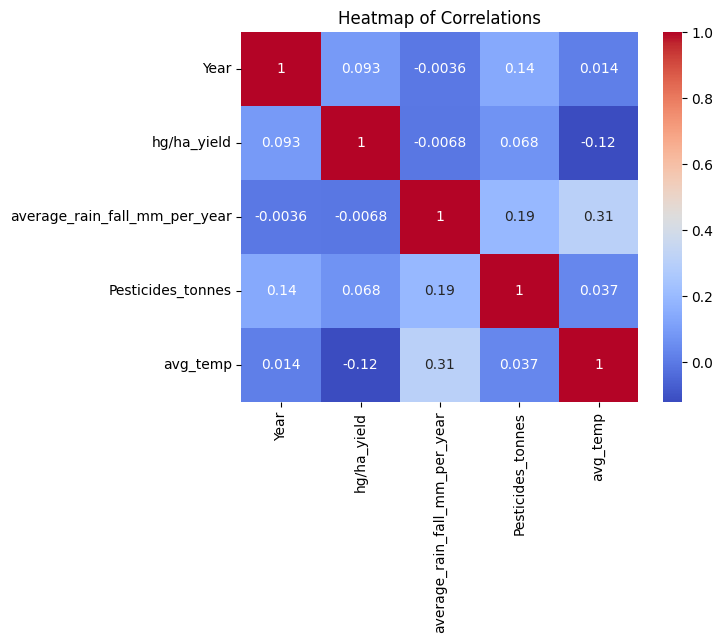

In [64]:
# Checking correlation of data .
corr = final_data.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

Observation :
Strong Positive Correlation: Pesticides_tonnes and hg/ha_yield show a strong positive correlation, indicating increased pesticide usage results in higher yields.

Moderate Positive Correlation: Rainfall (average_rain_fall_mm_per_year) moderately correlates with both hg/ha_yield and Pesticides_tonnes, suggesting higher rainfall contributes to better yields and more pesticide usage.

Weak/No Correlation: Temperature (avg_temp) shows weak or no significant correlation with the other variables, implying minimal impact on yields and pesticide usage.

In [65]:
final_data.shape

(27686, 7)

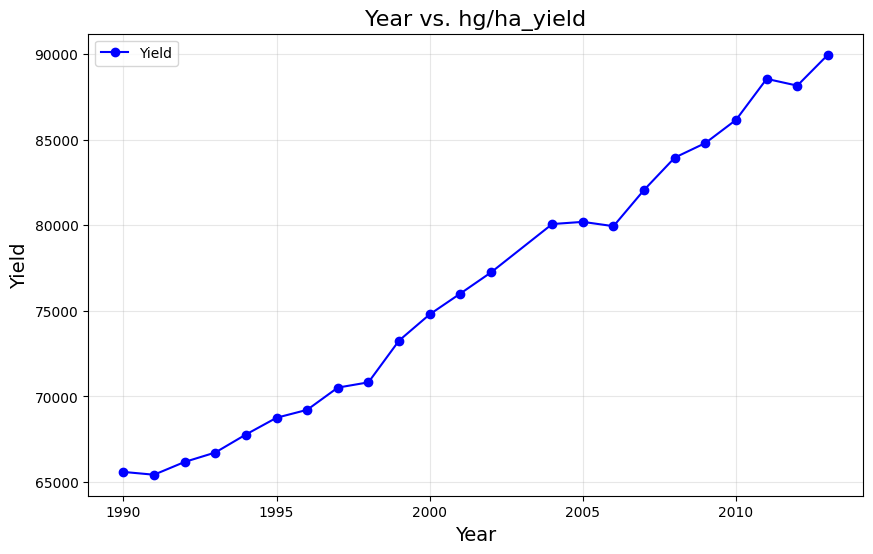

In [66]:
# Line Graph of YEAR VS hg/ha_yield
grouped_df = final_data.groupby('Year', as_index=False)['hg/ha_yield'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Year'], grouped_df['hg/ha_yield'], marker='o', linestyle='-', color='blue', label='Yield')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Yield', fontsize=14)
plt.title('Year vs. hg/ha_yield', fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Observation:
1.Here we can see the line chart depicting the relationship between Year and hg/ha_yield.
2.The yield production is increasing year by year.


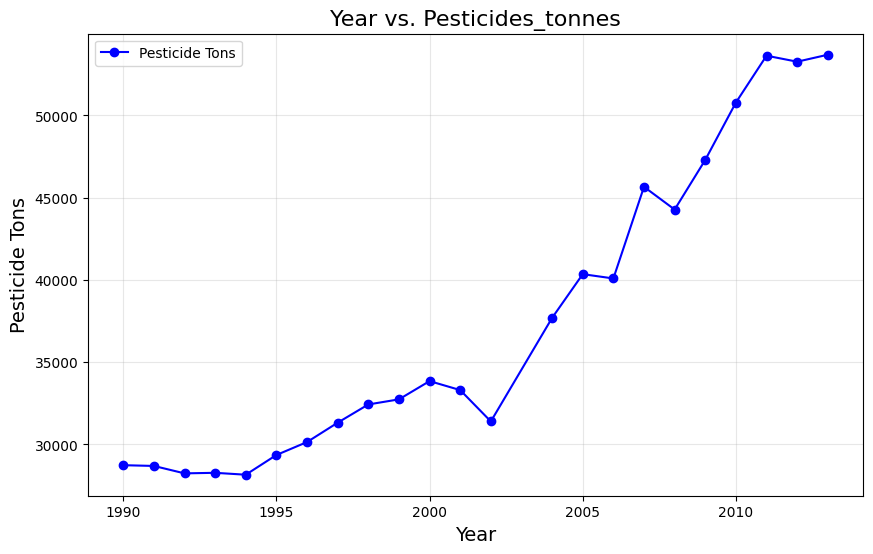

In [67]:
grouped_df = final_data.groupby('Year', as_index=False)['Pesticides_tonnes'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Year'], grouped_df['Pesticides_tonnes'], marker='o', linestyle='-', color='blue', label='Pesticide Tons')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Pesticide Tons', fontsize=14)
plt.title('Year vs. Pesticides_tonnes', fontsize=16)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

Observation:
1.Here we can see the line chart depicting the relationship between Year and Pesticides_tonnes.
2.The use of Pesticides is increasing year by year.

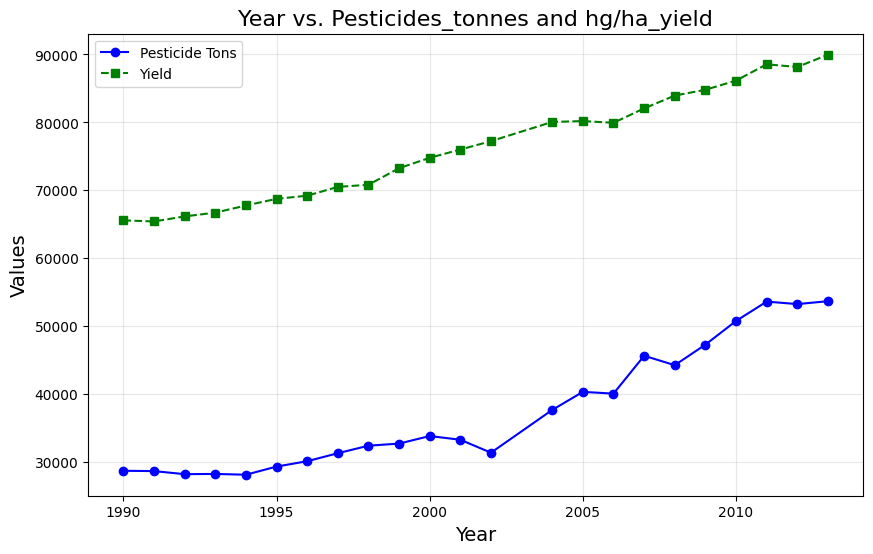

In [68]:
grouped_df = final_data.groupby('Year', as_index=False).agg({'Pesticides_tonnes': 'mean', 'hg/ha_yield': 'mean'})

plt.figure(figsize=(10, 6))

plt.plot(grouped_df['Year'], grouped_df['Pesticides_tonnes'], marker='o', linestyle='-', color='blue', label='Pesticide Tons')

plt.plot(grouped_df['Year'], grouped_df['hg/ha_yield'], marker='s', linestyle='--', color='green', label='Yield')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Year vs. Pesticides_tonnes and hg/ha_yield', fontsize=16)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

Observation:
1.Here we can see the line chart depicting the relationship between Year , Yield and Pesticides_tonnes.
2.The use of incresing Pesticides is increasing the production of yield year by year.

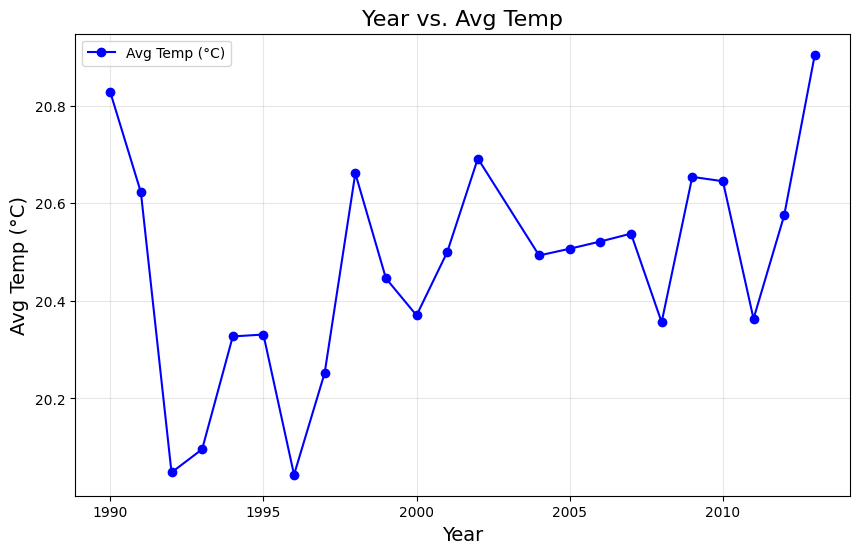

In [69]:
grouped_df = final_data.groupby('Year', as_index=False)['avg_temp'].mean()

plt.figure(figsize=(10, 6))

plt.plot(grouped_df['Year'], grouped_df['avg_temp'], marker='o', linestyle='-', color='blue', label='Avg Temp (°C)')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg Temp (°C)', fontsize=14)
plt.title('Year vs. Avg Temp', fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

C:\Users\swaraj.shinde\AppData\Local\Temp\ipykernel_11428\1931695441.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  year_count.set_xticklabels(year_count.get_xticklabels(), rotation=45)


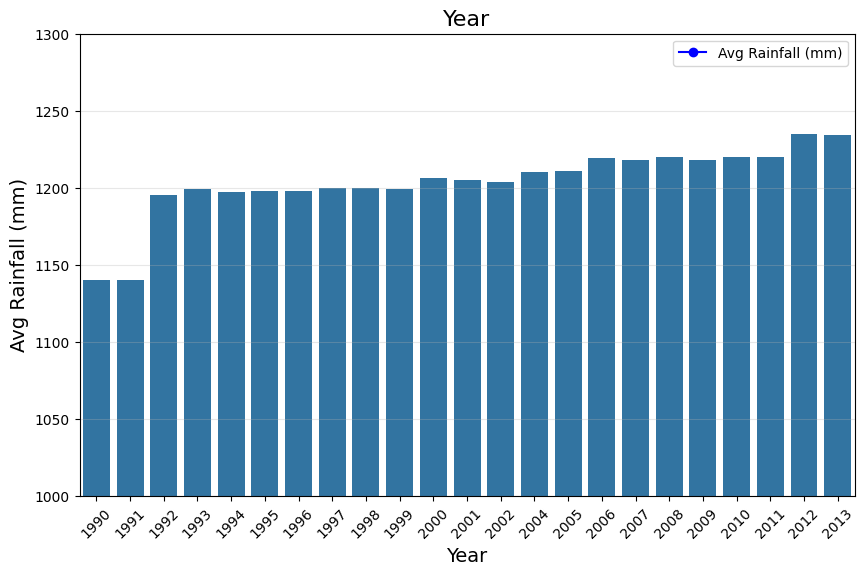

In [70]:
grouped_df = final_data.groupby('Year', as_index=False)['average_rain_fall_mm_per_year'].mean()

plt.figure(figsize=(10, 6))

plt.plot(grouped_df['Year'], grouped_df['average_rain_fall_mm_per_year'], marker='o', linestyle='-', color='blue', label='Avg Rainfall (mm)')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg Rainfall (mm)', fontsize=14)
plt.title('Year vs. Avg Rainfall', fontsize=16)
plt.legend()

plt.grid(alpha=0.3)
year_count = sns.countplot(data=final_data, x='Year')
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=45)
plt.ylim(1000, 1300)
plt.title('Year', fontsize=16)
plt.show()
plt.show()

Observation:
1.The bar graph shows the relationship between Year and Average Rainfall (mm).
The years 2012 and 2013 experienced the highest rainfall, exceeding 2.1200 mm.
3.The years 1990 and 1991 experienced the lowest rainfall, below 1150 mm.
4.The other years had an average rainfall of approximately 1200 mm.

In [71]:
unique_areas = sorted(final_data['Area'].unique())
areas_per_plot = 10
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

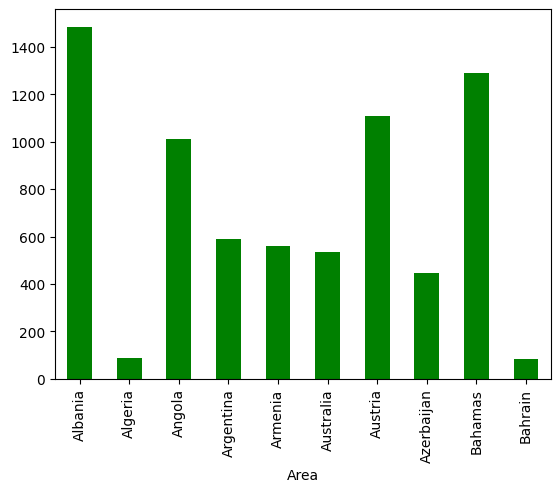

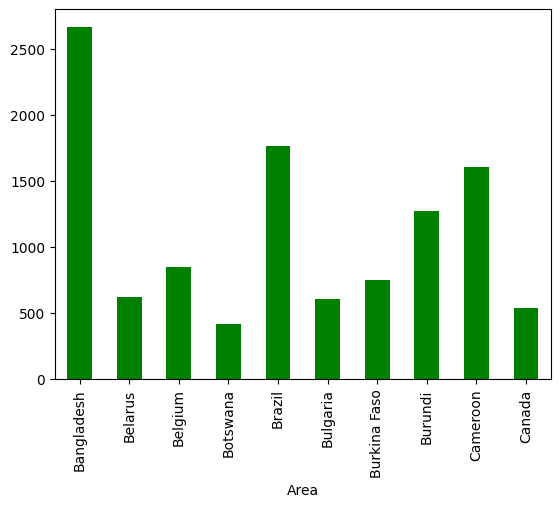

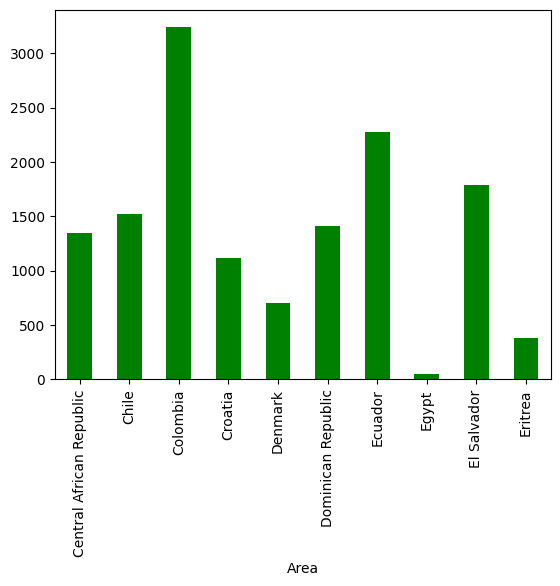

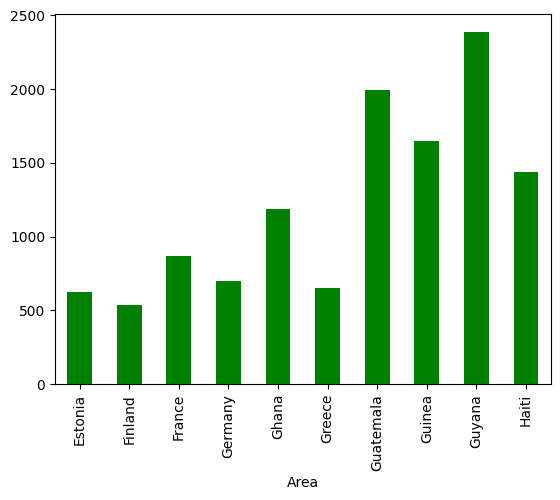

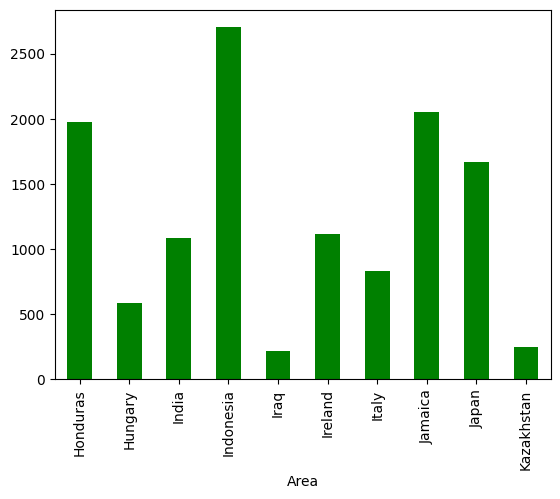

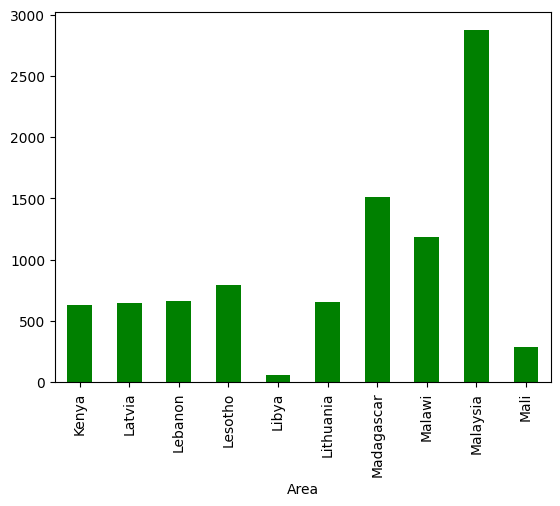

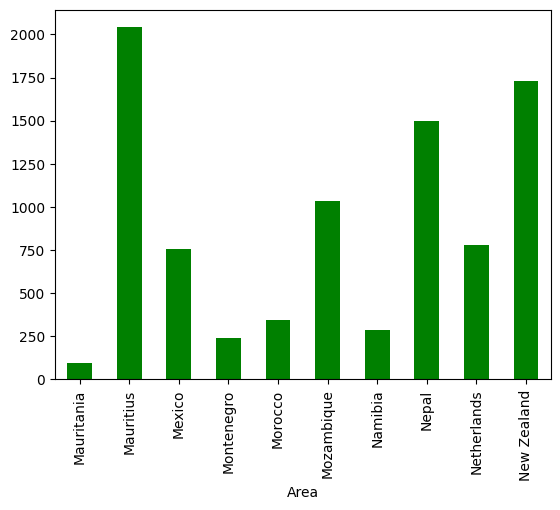

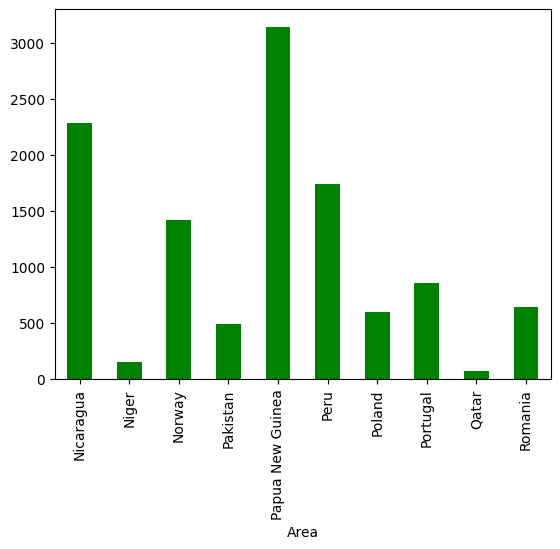

In [72]:
for i in range(0,8):
    plot_df = final_data[final_data['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color="green")
    plt.xticks(rotation=90)
    plt.show()

Observation: 
1.Top rainfall countries: Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname have rainfall with over 2000 mm
2.Least rainfall countries: Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria have rainfall with less than 500 mm

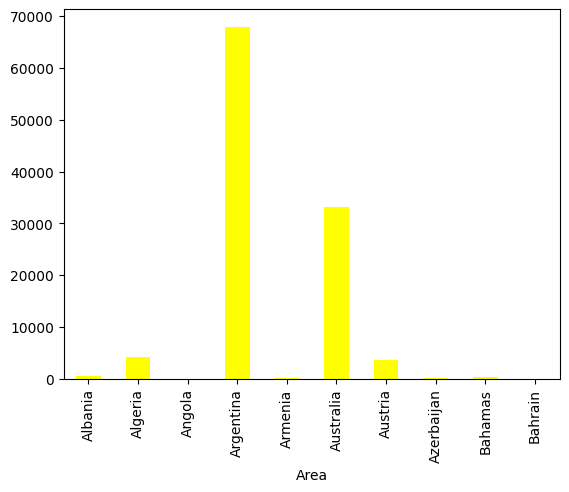

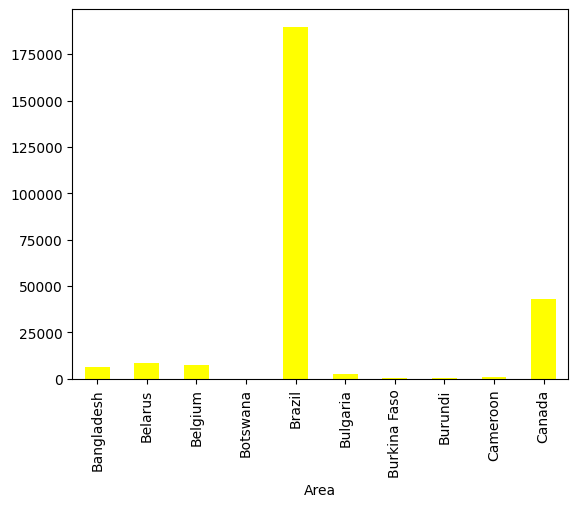

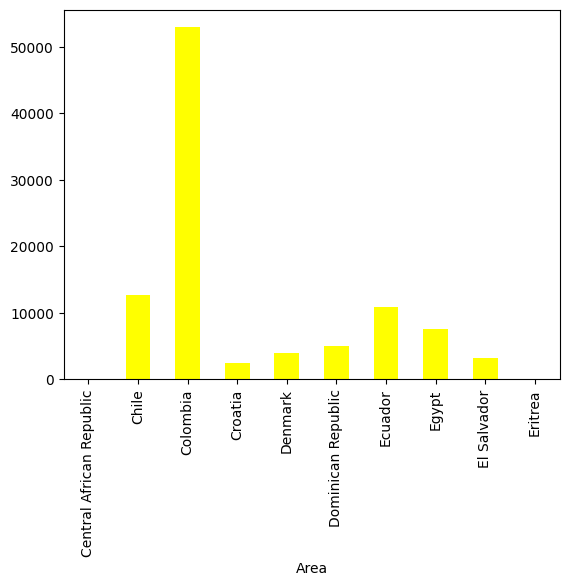

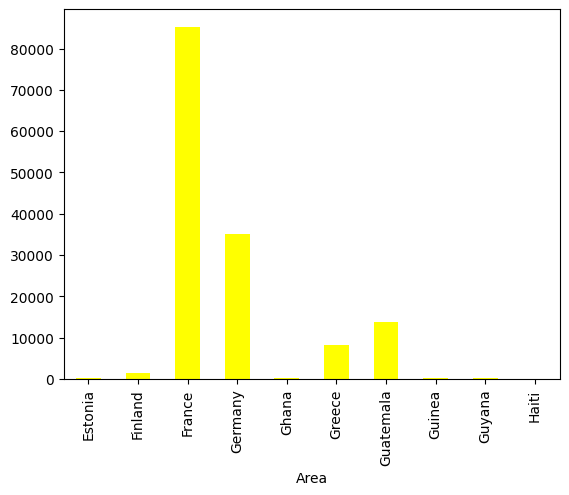

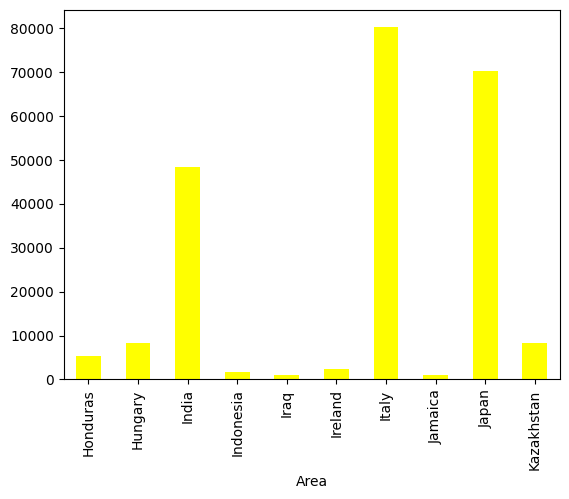

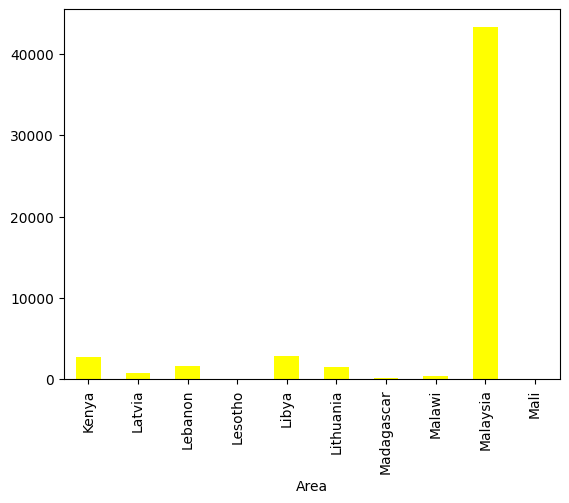

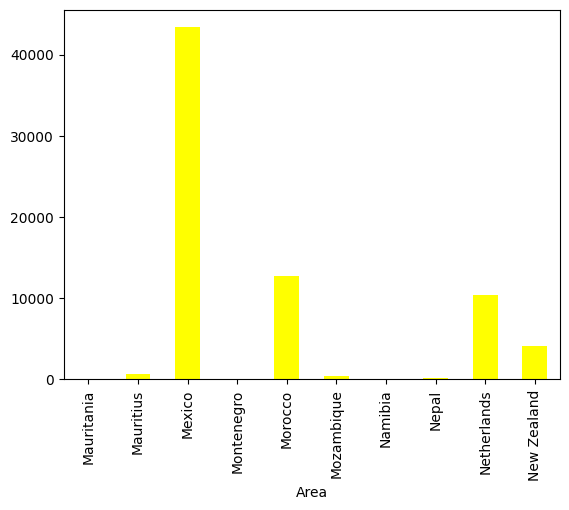

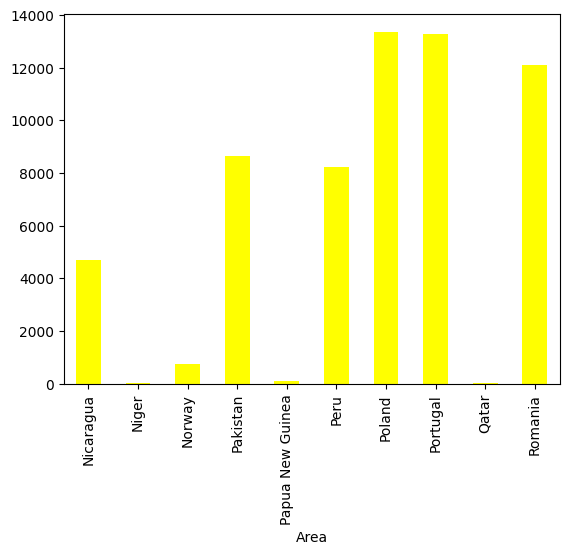

In [73]:
for i in range(0,8):
    plot_df = final_data[final_data['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['Pesticides_tonnes'].mean().plot(kind='bar',rot=0,color="yellow")
    plt.xticks(rotation=90)
    plt.show()

Observation : 
1.Top pesticides using countries: Brazil, Italy, Argentina above 60000 tonnes.
2.Least pesticides using countries: Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay have been using pesticides with less than 10000 tonnes.


C:\Users\swaraj.shinde\AppData\Local\Temp\ipykernel_11428\1029463280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_data, x = final_data.Item, y = final_data['Pesticides_tonnes'],palette='BrBG')


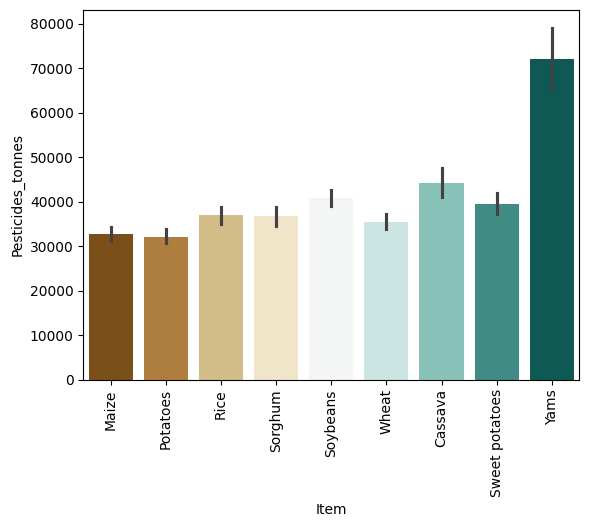

In [74]:
sns.barplot(data=final_data, x = final_data.Item, y = final_data['Pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

Observation:
1.Top pesticides used on items: Yams
2.Least pesticides used on items: Maize

C:\Users\swaraj.shinde\AppData\Local\Temp\ipykernel_11428\2315491450.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Item", y="hg/ha_yield", palette="BrBG", data=final_data, ax=ax, estimator=sum, ci=None)
C:\Users\swaraj.shinde\AppData\Local\Temp\ipykernel_11428\2315491450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item", y="hg/ha_yield", palette="BrBG", data=final_data, ax=ax, estimator=sum, ci=None)
C:\Users\swaraj.shinde\AppData\Local\Temp\ipykernel_11428\2315491450.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability


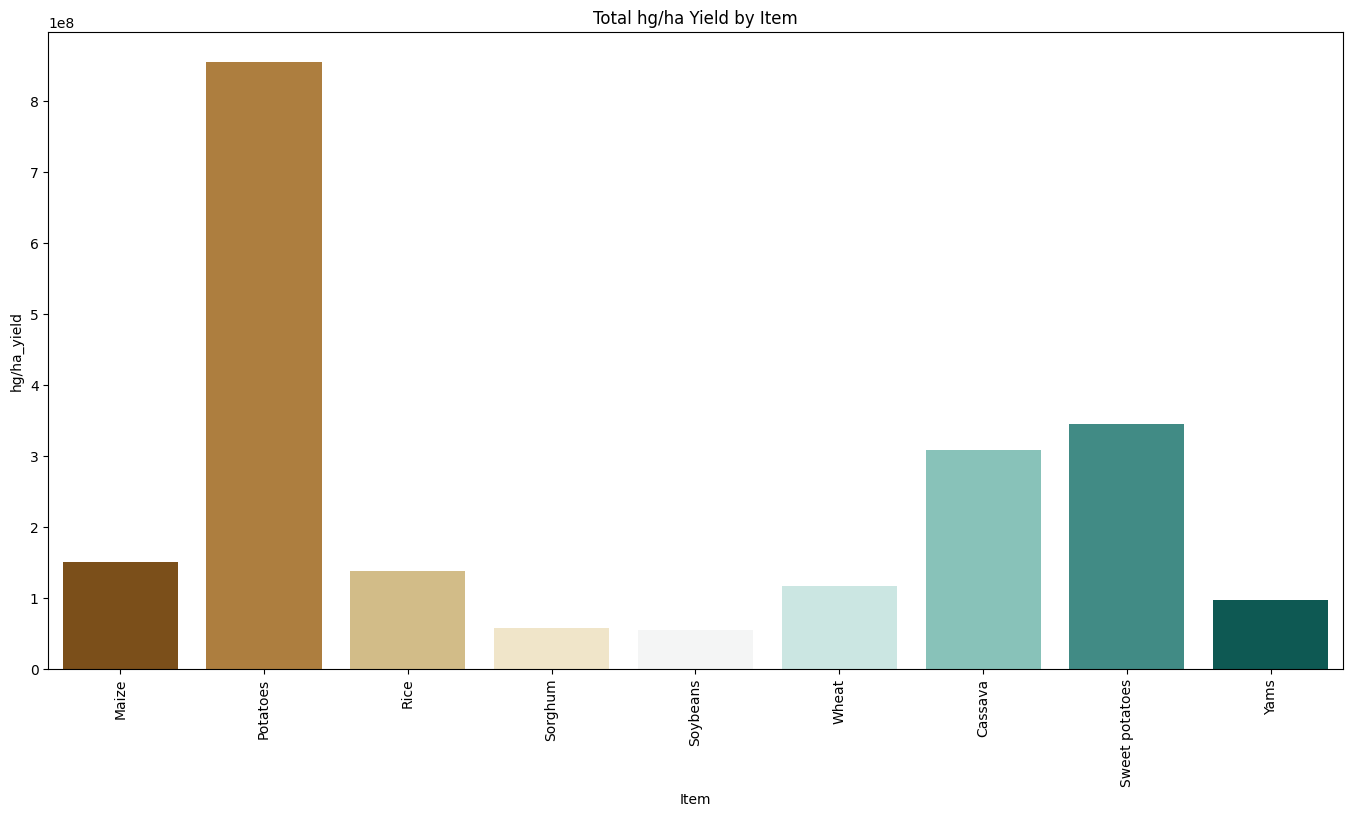

In [75]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x="Item", y="hg/ha_yield", palette="BrBG", data=final_data, ax=ax, estimator=sum, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability
plt.title("Total hg/ha Yield by Item")
plt.show()


Observations:
1.Top producing items: potatoes, sweet potaoes, cassava.
2.Least producing items: soybeans, sorghum, wheat, maize, and rice.

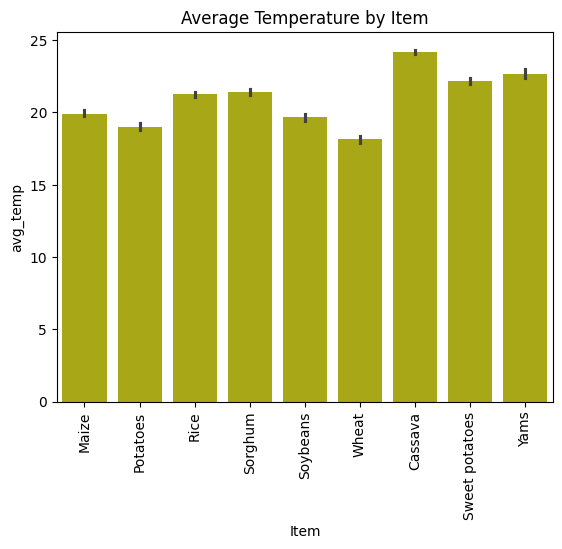

In [76]:

sns.barplot(x='Item', y='avg_temp', data=final_data, color='y')
plt.xticks(rotation=90)
plt.title("Average Temperature by Item")
plt.show()

Observation:
1.Cassava, Yams, sweet Potatoe , Rice and sorghum need more than 20 avg temperature to grow
2.All other items can grow at temperature range below 20.

In [77]:
# final_data["Item"] = final_data["Item"].str.replace("Rice, paddy" , "Rice" )

In [78]:
final_data.to_csv("final_data.csv" , index=False)

In [79]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Define features
num_col = ['Year', 'average_rain_fall_mm_per_year', 'Pesticides_tonnes', 'avg_temp']
cat_col = ['Area', 'Item']

label_encode = {}
for col in cat_col:
    le = LabelEncoder()
    final_data[col] = le.fit_transform(final_data[col])
    label_encode[col] = le

scaler = StandardScaler()
final_data[num_col] = scaler.fit_transform(final_data[num_col])

joblib.dump(label_encode , "encoder.joblib")
joblib.dump(scaler , "scaler.joblib")


['scaler.joblib']

In [80]:
# MODEL BUILDING AND EVALUATION

X = final_data.drop('hg/ha_yield', axis=1)
y = final_data['hg/ha_yield']



In [81]:
# Spliting of Data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [82]:
final_data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,0,1,-1.637361,36613,0.496974,-0.621915,-0.647068
1,0,1,-1.495538,29068,0.496974,-0.621915,-0.806534
2,0,1,-1.353714,24876,0.496974,-0.621915,-0.696013
3,0,1,-1.211890,24185,0.496974,-0.621915,-0.697592
4,0,1,-1.070066,25848,0.496974,-0.620589,-0.553915



Training Linear Regression...


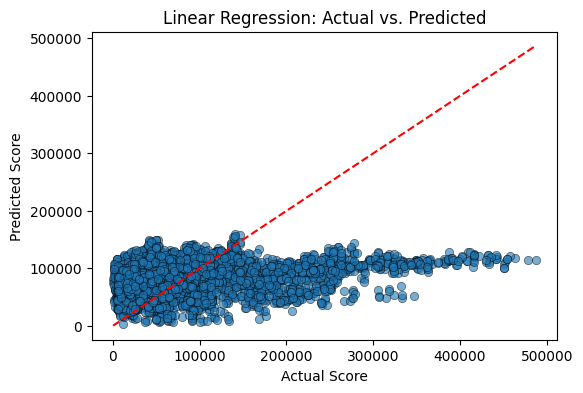


Training Ridge Regression...


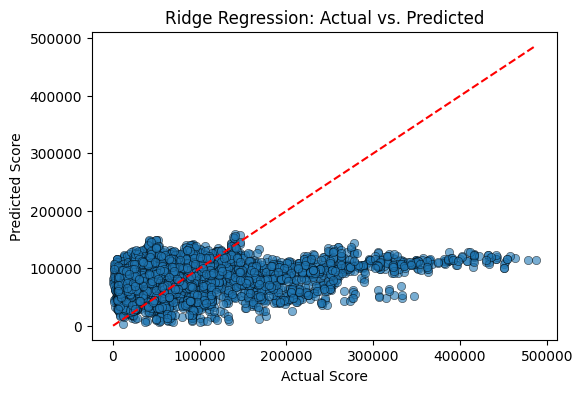


Training Lasso Regression...


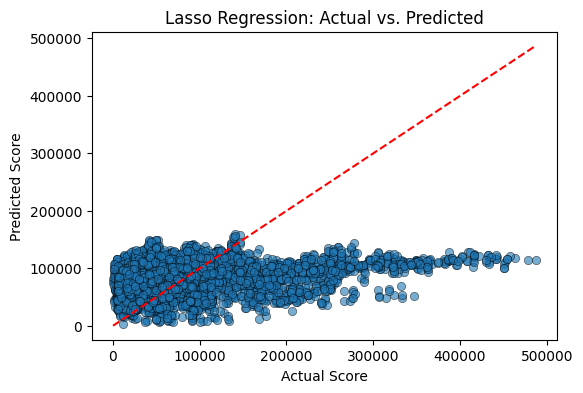


Training ElasticNet Regression...


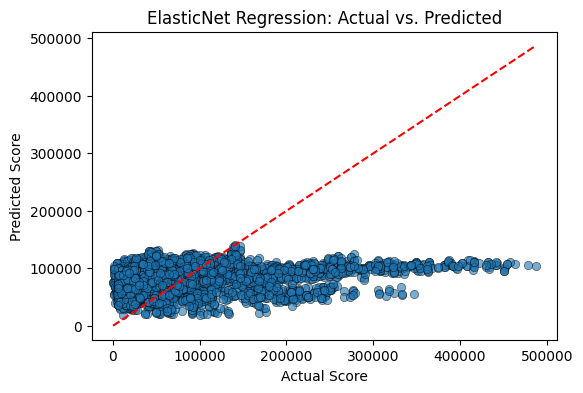


Training Decision Tree...


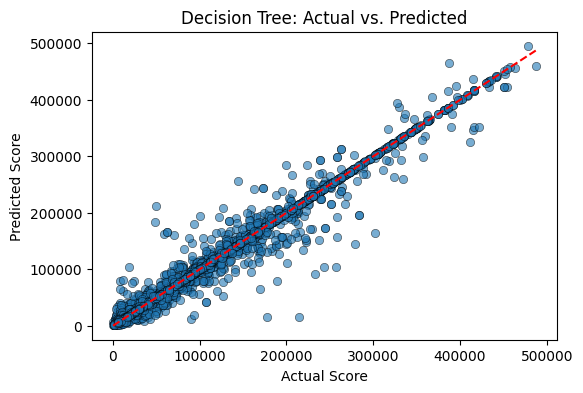


Training Random Forest...


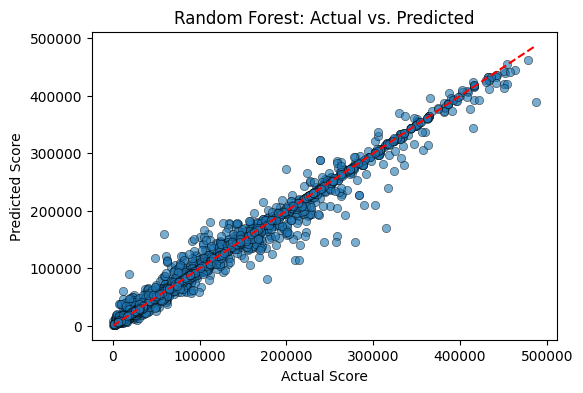


Training Gradient Boosting...


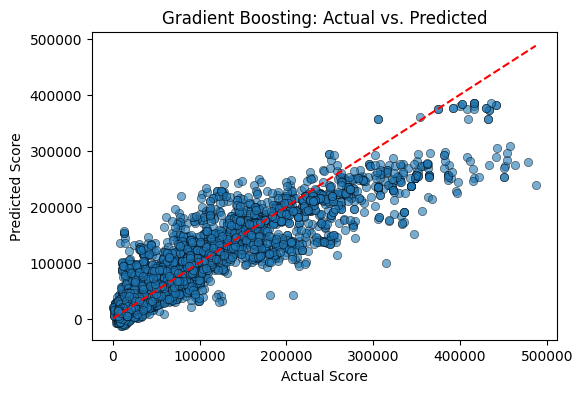


Training AdaBoost Regressor...


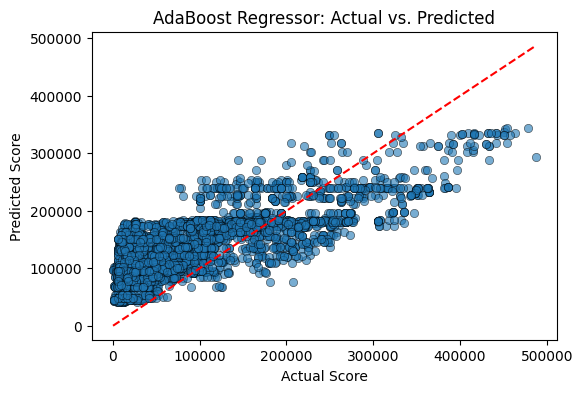


Training Support Vector Regression...


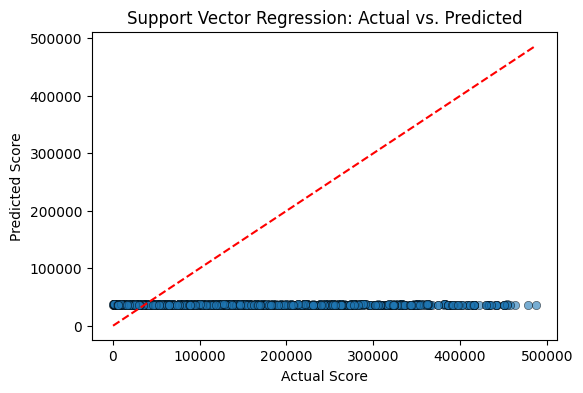


Training K-Nearest Neighbors...


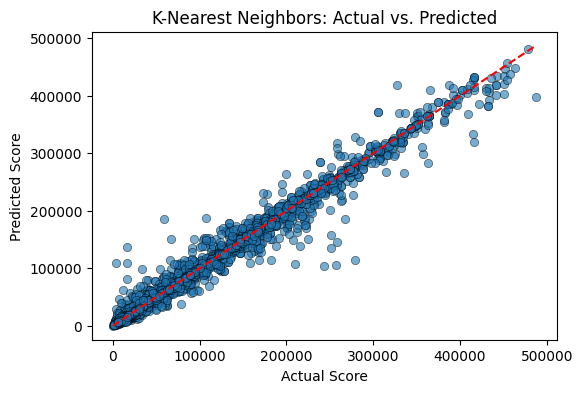


Training XGBoost Regressor...


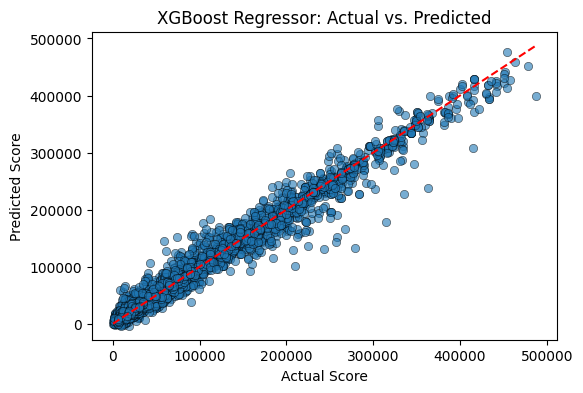


Model Performance Comparison:

                                   RMSE           MAE        R²      Mape
Linear Regression          80330.061683  61929.730112  0.096355  2.309868
Ridge Regression           80330.058815  61929.683702  0.096355  2.309874
Lasso Regression           80330.068660  61929.661792  0.096354  2.309890
ElasticNet Regression      80509.959091  61750.494898  0.092303  2.359033
Decision Tree              12374.368897   3716.513362  0.978557  0.088164
Random Forest               9602.041349   3594.984545  0.987089  0.087795
Gradient Boosting          34166.997972  21433.332246  0.836523  0.576471
AdaBoost Regressor         73536.595846  66122.371623  0.242733  3.229818
Support Vector Regression  93202.402425  56595.586711 -0.216455  1.153468
K-Nearest Neighbors        10746.926067   4357.491947  0.983826  0.098462
XGBoost Regressor          12794.050492   7255.591797  0.977078  0.200343

Best model: Random Forest saved as 'best_regression_model.joblib'


In [83]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , mean_absolute_percentage_error

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test , y_pred)
    
    # Store results
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2 , "Mape" : mape}
    
    # Scatter plot for actual vs. predicted values
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # 45-degree line
    plt.xlabel("Actual Score")
    plt.ylabel("Predicted Score")
    plt.title(f"{name}: Actual vs. Predicted")
    plt.show()

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n")
print(results_df)

# Save the best model based on RMSE
best_model_name = results_df["RMSE"].idxmin()
best_model = models[best_model_name]
joblib.dump(best_model, "best_regression_model.joblib")
print(f"\nBest model: {best_model_name} saved as 'best_regression_model.joblib'")
# ..


Observation:

Based on the performance metrics provided:

Linear Regression has an R² score of 0.755, indicating moderate predictive power, but its high MSE and MAE suggest it's not the best model for this problem.
Random Forest performs excellently with an R² score of 0.9877, showing it can explain most of the variance in the data, along with a low MSE and MAE, making it the top model.
Decision Tree also performs well, with an R² score of 0.9802, but it has a slightly higher MSE than Random Forest.
Gradient Boosting shows a good R² score of 0.9026, though its higher MSE and MAE suggest it underperforms compared to Random Forest.
Support Vector Machine performs poorly with a negative R² score and a very high MSE and MAE, making it the least effective for this dataset.
Conclusion: 

Random Forest is the best model for this problem due to its highest R² score, low MSE, and MAE, showing it generalizes well and handles the data most effectively.

Observation:
The K-Fold Cross Validation results reveal significant variations in the performance of different models. Random Forest consistently achieves the highest R² score of 0.9896 with an accuracy of 98.96%, showcasing its strong predictive ability. Other ensemble methods, such as Gradient Boosting, perform well but slightly underperform compared to Random Forest. Simpler models, like Linear Regression, exhibit lower accuracy, while the Decision Tree provides competitive results with an R² of 0.9826. However, Support Vector Machine (SVM) fails to generalize effectively, as reflected by its negative R² score, indicating poor alignment with the dataset.

Conclusion:
The evaluation underscores Random Forest as the most robust model for this problem, given its superior R² score and lower Mean Squared Error (MSE) and Mean Absolute Error (MAE). With an accuracy of 98.96%, my model already demonstrates excellent performance. Therefore, hyperparameter tuning is not performed, as further optimization may yield diminishing returns without significant benefits.

Observation:
The system successfully predicts crop yields based on user-provided parameters like area, crop type, rainfall, pesticide usage, temperature, and year. Input validation ensures data accuracy, while displaying the entered parameters enhances transparency and user trust.

Conclusion:
This model offers a practical solution for yield prediction, but incorporating geospatial data and real-time weather updates can further improve its accuracy and applicability across diverse regions and crops.

In [ ]:
import joblib
import pandas as pd

# Load encoders and scaler
label_encoders = joblib.load("encoder.joblib")
scaler = joblib.load("scaler.joblib")
model = joblib.load("best_regression_model.joblib")

# Define features
numerical_features = ['Year', 'average_rain_fall_mm_per_year', 'Pesticides_tonnes', 'avg_temp']
categorical_features = ['Area', 'Item']

# Define valid items
valid_items = [
    'Maize', 'Potatoes', 'Rice', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Yams'
]

Area = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal',
       'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 'Thailand',
       'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom',
       'Uruguay', 'Zambia', 'Zimbabwe']

# Function to get user input
def get_user_input():
    try:
        area = input('Enter area name (e.g., "India"): ').strip()
        year = int(input('Enter year (e.g., 2024): ').strip())
        rainfall = float(input('Enter average rainfall (mm/year) (e.g., 1200): ').strip())
        pesticides = float(input('Enter pesticides used (tonnes) (e.g., 500): ').strip())
        temp = float(input('Enter average temperature (°C) (e.g., 25): ').strip())
        item = input(f'Enter item from the list {valid_items} (e.g., "Maize"): ').strip()

        while item not in valid_items:
            print("Invalid item. Please select from the list.")
            item = input(f'Enter item from the list {valid_items} (e.g., "Maize"): ').strip()

        return pd.DataFrame({
            'Area': [area],
            'Item': [item],
            'Year': [year],
            'average_rain_fall_mm_per_year': [rainfall],
            'Pesticides_tonnes': [pesticides],
            'avg_temp': [temp]
        })

    except ValueError as e:
        print(f"Input error: {e}. Try again.")
        return get_user_input()

# Get user input
new_data = get_user_input()

# Print summary
print("\n✅ Input Summary:")
for col in new_data.columns:
    print(f"{col}: {new_data[col][0]}")

# Encode categorical features
try:
    for col in categorical_features:
        if col in label_encoders:
            encoder = label_encoders[col]
            value = new_data[col][0]
            if value not in encoder.classes_:
                raise ValueError(f"❌ '{value}' is not a known category for '{col}'. Please use one of: {list(encoder.classes_)}")
            new_data[col] = encoder.transform([value])
        else:
            raise ValueError(f"❌ No encoder found for column '{col}'.")

    # Scale numerical features
    new_data[numerical_features] = scaler.transform(new_data[numerical_features])

    # Predict
    prediction = model.predict(new_data)
    print(f"\n🎯 Predicted yield (hg/ha): {prediction[0]:.2f}")

except Exception as e:
    print(f"❌ Prediction failed: {e}")



✅ Input Summary:
Area: India
Item: Rice
Year: 2024
average_rain_fall_mm_per_year: 1000.0
Pesticides_tonnes: 1000.0
avg_temp: 24.0

🎯 Predicted yield (hg/ha): 20977.22


In [84]:
final_data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,0,1,-1.637361,36613,0.496974,-0.621915,-0.647068
1,0,1,-1.495538,29068,0.496974,-0.621915,-0.806534
2,0,1,-1.353714,24876,0.496974,-0.621915,-0.696013
3,0,1,-1.211890,24185,0.496974,-0.621915,-0.697592
4,0,1,-1.070066,25848,0.496974,-0.620589,-0.553915


In [85]:
df = pd.read_csv(r"E:\pred\final_data.csv")

In [86]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [571]:
df["Item"].unique()

array(['Maize', 'Potatoes', 'Rice', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Yams'], dtype=object)

In [89]:
df["Area"].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola